In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('BreastCancer_final1.csv')

In [4]:
data.head()

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,21,26.453292,0,1,0,0,0,11,1,0
1,52,31.557711,0,1,1,1,1,14,3,1
2,52,14.604623,0,1,1,0,0,12,3,1
3,50,31.726225,0,1,1,0,0,13,3,1
4,22,29.022006,0,2,0,0,0,9,1,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data[['Age', 'BMI', 'BreastFeeding', 'Marital Status', 'Alcohol', 'Smoking',
       'BreastCancerHistory', 'Age at firstPeriod', 'MenstrualCycle']]
y = data['Cancer Positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.svm import SVC

In [9]:
svm = SVC()

In [10]:
svm.fit(X_train,y_train)

C:\Users\Ziyam Santhosh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
svm_predictions = svm.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       474
           1       0.97      0.83      0.89       315

    accuracy                           0.92       789
   macro avg       0.93      0.90      0.91       789
weighted avg       0.92      0.92      0.92       789



In [16]:
print(confusion_matrix(y_test,svm_predictions))

[[466   8]
 [ 55 260]]


In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [19]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [20]:
grid.fit(X_train,y_train)

C:\Users\Ziyam Santhosh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.582, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.582, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.583, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.890, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.893, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.880, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ................. C=100, gamma=0.0001, score=0.900, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.831, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.818, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.823, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.938, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.927, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.929, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [21]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [22]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
grid_predictions = grid.predict(X_test)

In [24]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       474
           1       0.97      0.96      0.97       315

    accuracy                           0.97       789
   macro avg       0.97      0.97      0.97       789
weighted avg       0.97      0.97      0.97       789



In [25]:
print(confusion_matrix(y_test,grid_predictions))

[[465   9]
 [ 12 303]]


In [26]:
import joblib as jb

In [59]:
jb.dump(svm,'model3.pkl')

['model3.pkl']

In [61]:
model = jb.load('model3.pkl')

In [62]:
print(model.predict([[23,19.5,0,3,0,0,0,13,1]]))

[0]


In [63]:
print(model.predict([[21,30.1,0,3,0,0,0,13,1]]))

[0]


In [29]:
model = jb.load('model2.pkl')

In [30]:
data.columns

Index(['Age', 'BMI', 'BreastFeeding', 'Marital Status', 'Alcohol', 'Smoking',
       'BreastCancerHistory', 'Age at firstPeriod', 'MenstrualCycle',
       'Cancer Positive'],
      dtype='object')

In [31]:
print(model.predict([[23,19.5,0,3,0,0,0,13,1]]))

[0]


In [35]:
print(model.predict([[21,30.1,0,3,0,0,0,13,1]]))

[1]


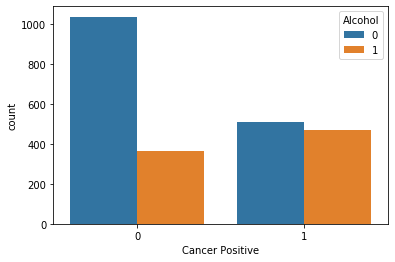

In [38]:
sns.countplot(x='Cancer Positive',data=data,hue='Alcohol')

C:\Users\Ziyam Santhosh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ziyam Santhosh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


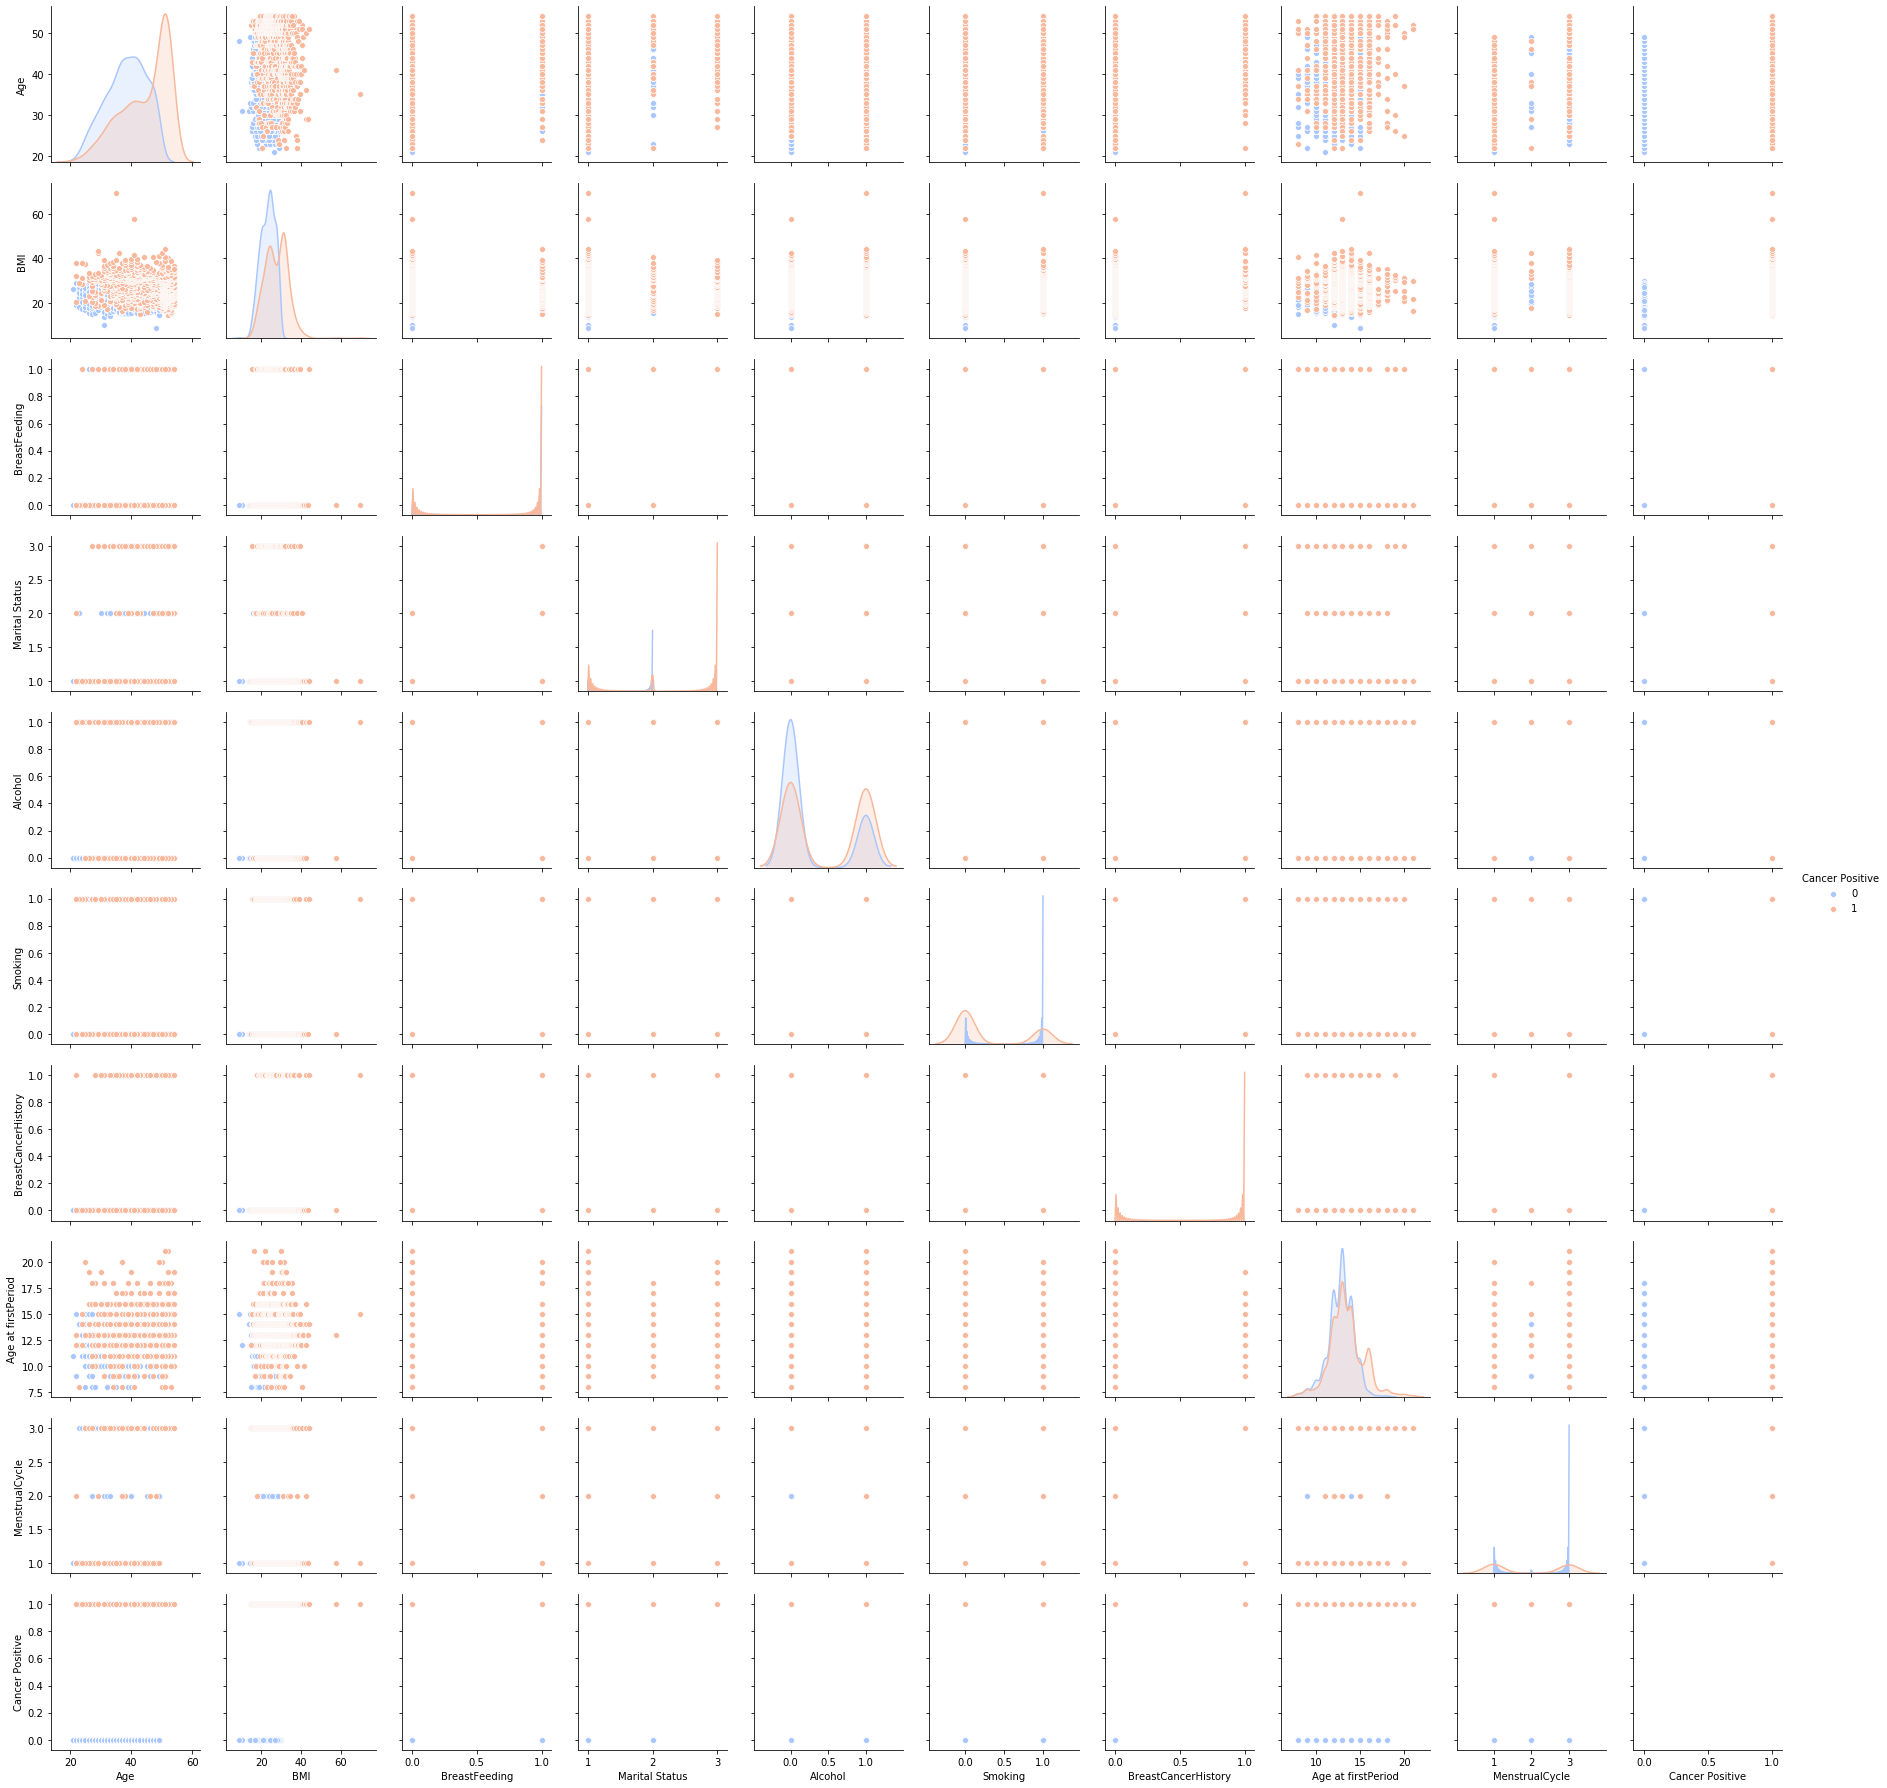

In [41]:
sns.pairplot(data,hue='Cancer Positive',palette='coolwarm')

C:\Users\Ziyam Santhosh\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


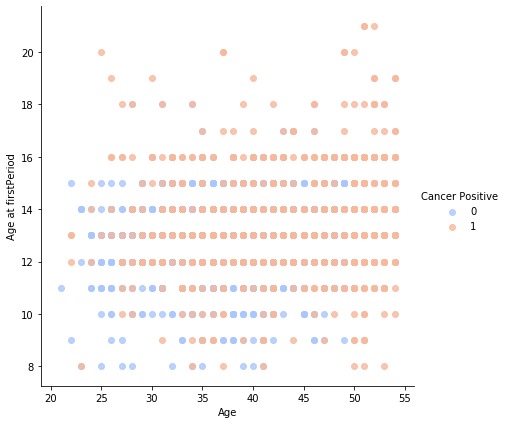

In [43]:
sns.lmplot('Age','Age at firstPeriod',data=data, hue='Cancer Positive',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [53]:
print(model.predict([[23,19.5,0,3,0,0,0,13,1]]))

[0]


In [58]:
model.predict_proba([[23,19.5,0,3,0,0,0,13,1]])

AttributeError: predict_proba is not available when  probability=False